In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

#Set the typography that you want to use
mpl.rcParams['font.family'] = 'Arial'

# Set colors in order of comparison, all matplotlib colors are available 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato"])  

# Velocity vs Q

In this script, I will compute the average velocity along the channel versus the injected flux in uL/min. The trajectories of the particles were computed in script tracking in the same folder. 

In [2]:
# Choosing directory and files
directory= "/home/carolina/PROJECT_Y-junction-microfluidics/Single-particle/V_vs_Q-10xOil_B=0"

filenames = [file for file in glob.glob(
    os.path.join(directory,('16-02-2023*.dat')))]
len(filenames)
filenames

['/home/carolina/PROJECT_Y-junction-microfluidics/Single-particle/V_vs_Q-10xOil_B=0/16-02-2023_3ul-min.dat',
 '/home/carolina/PROJECT_Y-junction-microfluidics/Single-particle/V_vs_Q-10xOil_B=0/16-02-2023_2,5ul-min.dat',
 '/home/carolina/PROJECT_Y-junction-microfluidics/Single-particle/V_vs_Q-10xOil_B=0/16-02-2023_0,5ul-min.dat',
 '/home/carolina/PROJECT_Y-junction-microfluidics/Single-particle/V_vs_Q-10xOil_B=0/16-02-2023_1,5ul-min.dat',
 '/home/carolina/PROJECT_Y-junction-microfluidics/Single-particle/V_vs_Q-10xOil_B=0/16-02-2023_1ul-min.dat',
 '/home/carolina/PROJECT_Y-junction-microfluidics/Single-particle/V_vs_Q-10xOil_B=0/16-02-2023_2ul-min.dat']

In [3]:
three = pd.read_csv(filenames[0], index_col = [0], sep ="\t", usecols = [0,1,2,3])
two_half = pd.read_csv(filenames[1], index_col = [0], sep ="\t", usecols = [0,1,2,3])
half = pd.read_csv(filenames[2], index_col = [0], sep ="\t", usecols = [0,1,2,3])
one_half = pd.read_csv(filenames[3], index_col = [0], sep ="\t", usecols = [0,1,2,3])
one = pd.read_csv(filenames[4], index_col = [0], sep ="\t", usecols = [0,1,2,3])
two = pd.read_csv(filenames[5], index_col = [0], sep ="\t", usecols = [0,1,2,3])


vel = pd.concat((three,two_half,half,one_half,one,two), keys = [3,2.5,0.5,1.5,1,2])

vel.index.names = ['flow','particle']

In [4]:
vel

v_e        v_c        v_b
flow particle                                 
3.0  0         15.680540  33.660127  17.766365
     1         15.755233  39.334308  20.618738
     2         14.162672  34.115381  21.096468
     3         13.661792  32.440750  17.534865
     4         23.366361  33.652321  24.459993
     5         24.519060  37.599544  24.000992
     6         28.417337  37.127967  21.041366
2.5  0         16.552816  36.104709  21.813496
     1         25.250506  30.948103  21.516183
     2         21.159955  32.608055  18.604285
     3         30.428486  32.581951  17.115182
     4         18.758320  33.601462  21.279461
     5         18.835586  34.252702  21.925451
     6         21.736407  31.624002  16.483311
0.5  0               NaN  11.310910  11.362518
     1         17.881563  14.381782  13.803837
     2         14.572647  12.645181  12.576736
     3         20.673781  13.970694  13.025178
     4         14.537849  13.112349  13.226156
     5         15.944103  13.087166  11.910596
     6         16.245443  14.981017  13.811235
     7         19.278548  17.960645  13.273896
     8         15.964387  10.571773  10.045154
1.5  0         11.097127  20.898493  12.314303
     1         12.221833  21.323803  12.658657
     2         12.261886  37.122411  16.263024
     3         11.626182  23.170403  12.633698
     4         13.893504  37.091145  18.766796
     5         13.553069  20.509273  11.918955
     6         13.165454  22.184575  14.248374
     7         13.499279  23.021963  13.828335
     8         11.800063  21.562003  16.127431
     9         12.648805  22.896042  15.542375
     10        14.015992  20.692362  11.920994
     11        16.160386  21.611612  11.941786
     12              NaN  19.343557  15.369606
     13        11.970696  19.970860  16.817398
     14        13.230426  19.026075  13.188586
     15        15.068890  19.383075  14.106342
     16        11.883563  19.829809  13.107338
1.0  0         23.549671  20.165561  14.619161
     1         16.209692  24.088080  13.647158
     2         19.658195  23.052149  14.848935
     3         13.659003  15.546565  15.233976
     4         12.205322  15.810948  12.980866
2.0  0         16.832206  25.306800  15.581492
     1          8.518525  29.434797  14.126311
     2          9.022331  28.994092  15.083948
     3          9.103913  31.299108  15.141624
     4         17.669928  24.745884  15.837249
     5         17.669928  24.745884  15.837249
     6         17.669928  24.745884  15.837249

In [5]:
mean = vel.groupby(vel.index.get_level_values(0)).mean()
err = vel.groupby(vel.index.get_level_values(0)).std()/np.sqrt(vel.groupby(vel.index.get_level_values('flow')).count())

In [6]:
mean

,v_e,v_c,v_b
flow,,,
0.5,16.887290,13.557946,12.559478
1.0,17.056377,19.732661,14.266019
1.5,13.006072,22.919851,14.162000
2.0,13.783823,27.038921,15.349303
2.5,21.817439,33.102998,19.819624
3.0,19.366142,35.418628,20.931256


In [7]:
err

,v_e,v_c,v_b
flow,,,
0.5,0.780052,0.721473,0.416048
1.0,2.058204,1.775941,0.414491
1.5,0.337032,1.332317,0.489111
2.0,1.738190,1.052055,0.237920
2.5,1.775098,0.653343,0.890980
3.0,2.239879,0.973325,1.018453


No handles with labels found to put in legend.


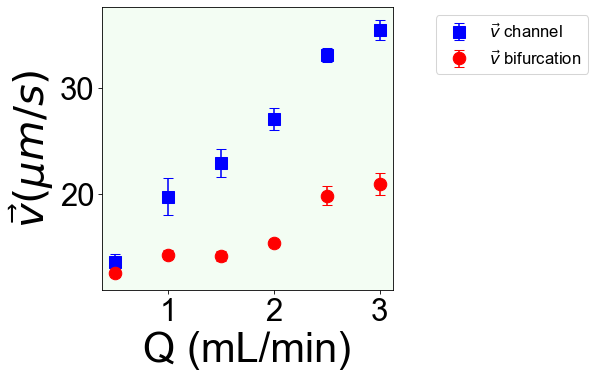

In [8]:
fig, ax1 = plt.subplots(figsize=(5,5))

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.7, 1))

plt.errorbar(mean.index.get_level_values(0), mean.v_c, yerr = err.v_c ,fmt = 's', c= 'b', capsize = 5, label = r'$ \vec{v} $ channel', markersize = 12)
plt.errorbar(mean.index.get_level_values(0), mean.v_b,  yerr = err.v_b ,fmt ='o', c ='red',capsize = 5, label = r'$ \vec{v} $ bifurcation', markersize = 12)


plt.xlabel('Q (mL/min)', size = 40)
plt.ylabel(r'$ \vec{v} (\mu m/s)$', size = 40)
ax1.legend(fontsize = 16, bbox_to_anchor=(1.7, 1))
ax1.set_facecolor('lightgreen')
ax1.patch.set_alpha(0.1)
#ax1.set_facecolor('xkcd:very light pink')
#ax1.set_facecolor((1.0, 0.47, 0.42))

In [9]:
mean.to_csv("velocity_vs_Q.dat", sep ="\t")
err.to_csv("velocity_vs_Q_uncertainty.dat", sep ="\t")

# Driving Force

In [11]:
import numpy as np

In [12]:
fric_coeff = 6*np.pi*(10**(-3))*(18.82/2)*10**(-6)
fric_coeff

1.7737432122167973e-07

In [13]:
vel['v_c(m/s)'] = vel['v_c']*10**(-6)

In [14]:
vel['Force(N)'] = fric_coeff*vel['v_c(m/s)']

In [15]:
mean = vel.groupby(vel.index.get_level_values(0)).mean()
err = vel.groupby(vel.index.get_level_values(0)).std()/np.sqrt(vel.groupby(vel.index.get_level_values('flow')).count())

In [16]:
mean

,v_e,v_c,v_b,v_c(m/s),Force(N)
flow,,,,,
0.5,16.887290,13.557946,12.559478,0.000014,2.404832e-12
1.0,17.056377,19.732661,14.266019,0.000020,3.500067e-12
1.5,13.006072,22.919851,14.162000,0.000023,4.065393e-12
2.0,13.783823,27.038921,15.349303,0.000027,4.796010e-12
2.5,21.817439,33.102998,19.819624,0.000033,5.871622e-12
3.0,19.366142,35.418628,20.931256,0.000035,6.282355e-12


No handles with labels found to put in legend.
No handles with labels found to put in legend.


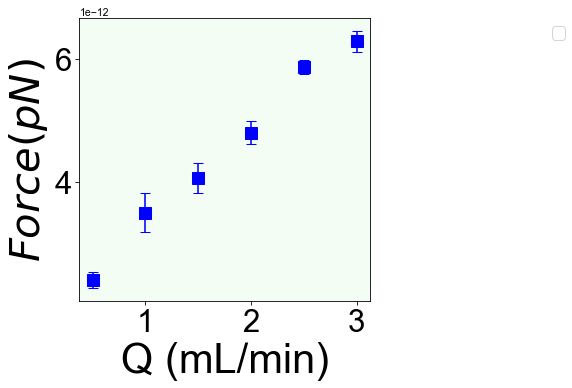

In [17]:
fig, ax1 = plt.subplots(figsize=(5,5))

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.7, 1))

plt.errorbar(mean.index.get_level_values(0), mean['Force(N)'], yerr = err['Force(N)'] ,fmt = 's', c= 'b', capsize = 5,  markersize = 12)

plt.xlabel('Q (mL/min)', size = 40)
plt.ylabel(r'$ Force (pN)$', size = 40)
ax1.legend(fontsize = 16, bbox_to_anchor=(1.7, 1))
ax1.set_facecolor('lightgreen')
ax1.patch.set_alpha(0.1)
#ax1.set_facecolor('xkcd:very light pink')
#ax1.set_facecolor((1.0, 0.47, 0.42))

In [19]:
mean.to_csv('Force_vs_Q.dat', sep ="\t" )

In [21]:
err.to_csv('Force_vs_Q_uncertainty.dat', sep ="\t" )

In [22]:
err

,v_e,v_c,v_b,v_c(m/s),Force(N)
flow,,,,,
0.5,0.780052,0.721473,0.416048,7.214731e-07,1.279708e-13
1.0,2.058204,1.775941,0.414491,1.775941e-06,3.150063e-13
1.5,0.337032,1.332317,0.489111,1.332317e-06,2.363189e-13
2.0,1.738190,1.052055,0.237920,1.052055e-06,1.866075e-13
2.5,1.775098,0.653343,0.890980,6.533433e-07,1.158863e-13
3.0,2.239879,0.973325,1.018453,9.733247e-07,1.726428e-13
